## 1. Check Data quality

#### 1.1 Load data

In [2]:
import pandas as pd
import numpy as np

#Load data
df = pd.read_csv("MASTER_PhonesmartdataAll_CCI_AdvStats.csv")
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,,2,4,49,70,,,,1178.700000,1216.387500
1,2021,37,2,8,44,33,,,,946.470000,785.597500
2,2022,,1,,,,,,,1182.741667,950.900000
3,2022,,1,,,,,,,1778.950000,984.333333
4,2022,,2,,,,,,,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1,3,56,39,iPhone,507,,915.785917,747.883194
544,2020,27,2,5,64,77,iPhone,267,,877.783333,720.729583
545,2020,36,2,2,46,43,iPhone,610,,1211.483333,1049.979167
546,2020,31,2,4,67,69,iPhone,558,,899.774583,845.612083


In [3]:
df.replace(" ", np.nan, inplace=True)

#### 1.2 Drop useless column: Device

In [4]:
df = df.drop('Device', axis=1, errors='ignore')

#### 1.3 Deal with missing values

In [5]:
df.describe()

,Year,VS_RT_correct_Conjunction,VS_RT_correct_Single
count,548.000000,548.000000,548.000000
mean,2020.711679,942.567275,841.467643
std,0.731187,195.525323,172.026277
min,2020.000000,521.500000,503.000000
25%,2020.000000,823.408271,730.852768
50%,2021.000000,903.227792,796.977778
75%,2021.000000,1012.179167,886.148194
max,2022.000000,2125.150000,1896.975000


In [6]:
# Calculate the sum of missing values for each column
missing_values = df.isnull().sum()
missing_values

Year                           0
Age                           25
GenderNum                     10
AutismQuotient                 6
STAI                           9
BRIEF_Total                    7
DailyAvgMins                 183
DailyAvePickups              417
VS_RT_correct_Conjunction      0
VS_RT_correct_Single           0
dtype: int64

In [14]:
df['DailyAvgMins'] = pd.to_numeric(df['DailyAvgMins'], errors='coerce')
#errors='coerce' set null to NAN 
df['DailyAvePickups'] = pd.to_numeric(df['DailyAvePickups'], errors='coerce')
mean_mins = df['DailyAvgMins'].mean()
mean_picks = df['DailyAvePickups'].mean()
rounded_mean_mins = round(mean_mins)
rounded_mean_pickups = round(mean_picks)

df['DailyAvgMins'].fillna(rounded_mean_mins, inplace=True)
df['DailyAvePickups'].fillna(rounded_mean_pickups, inplace=True)

In [15]:
rounded_mean_mins

273

In [16]:
rounded_mean_pickups

105

In [17]:
missing_values = df.isnull().sum()
missing_values

Year                          0
Age                          25
GenderNum                    10
AutismQuotient                6
STAI                          9
BRIEF_Total                   7
DailyAvgMins                  0
DailyAvePickups               0
VS_RT_correct_Conjunction     0
VS_RT_correct_Single          0
dtype: int64

In [18]:
df.dropna(inplace = True)
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
1,2021,37,2,8,44,33,273.0,105.0,946.470000,785.597500
5,2020,24,2,6,47,0,273.0,105.0,838.077083,988.451333
6,2022,28,2,6,49,70,273.0,105.0,845.850000,901.218750
7,2021,31,2,1,43,44,259.0,54.0,1015.666667,1524.733333
8,2021,33,2,2,51,24,475.0,112.0,1278.250000,1263.913333
...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1,3,56,39,507.0,105.0,915.785917,747.883194
544,2020,27,2,5,64,77,267.0,105.0,877.783333,720.729583
545,2020,36,2,2,46,43,610.0,105.0,1211.483333,1049.979167
546,2020,31,2,4,67,69,558.0,105.0,899.774583,845.612083


In [19]:
df.describe()

,Year,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,2020.694553,272.157588,104.947471,942.449333,841.728273
std,0.716071,119.212754,20.463803,189.073216,166.681797
min,2020.000000,0.000000,32.000000,625.630917,604.172889
25%,2020.000000,203.000000,105.000000,825.034458,733.631577
50%,2021.000000,273.000000,105.000000,906.604167,799.913889
75%,2021.000000,303.000000,105.000000,1011.288333,885.997222
max,2022.000000,798.000000,272.000000,2125.150000,1849.425000


#### 1.4 Convert specified datatype to numeric

In [20]:
df.dtypes

Year                           int64
Age                           object
GenderNum                     object
AutismQuotient                object
STAI                          object
BRIEF_Total                   object
DailyAvgMins                 float64
DailyAvePickups              float64
VS_RT_correct_Conjunction    float64
VS_RT_correct_Single         float64
dtype: object

In [21]:
# Convert necessary columns to int
float_columns = ['Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'DailyAvePickups']
df[float_columns] = df[float_columns].apply(pd.to_numeric, errors='coerce').astype(int)
df.dtypes

Year                           int64
Age                            int32
GenderNum                      int32
AutismQuotient                 int32
STAI                           int32
BRIEF_Total                    int32
DailyAvgMins                   int32
DailyAvePickups                int32
VS_RT_correct_Conjunction    float64
VS_RT_correct_Single         float64
dtype: object

#### 1.5 Handle duplicates

In [22]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

#### 1.6 Handle Outliers

In [23]:
df.describe()

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,2020.694553,30.278210,1.799611,3.206226,47.488327,51.097276,272.157588,104.947471,942.449333,841.728273
std,0.716071,8.505154,0.428879,1.760593,11.655084,24.602142,119.212754,20.463803,189.073216,166.681797
min,2020.000000,16.000000,1.000000,0.000000,20.000000,0.000000,0.000000,32.000000,625.630917,604.172889
25%,2020.000000,25.000000,2.000000,2.000000,39.000000,34.000000,203.000000,105.000000,825.034458,733.631577
50%,2021.000000,29.000000,2.000000,3.000000,47.000000,50.000000,273.000000,105.000000,906.604167,799.913889
75%,2021.000000,34.000000,2.000000,4.000000,56.000000,67.000000,303.000000,105.000000,1011.288333,885.997222
max,2022.000000,101.000000,3.000000,10.000000,77.000000,140.000000,798.000000,272.000000,2125.150000,1849.425000


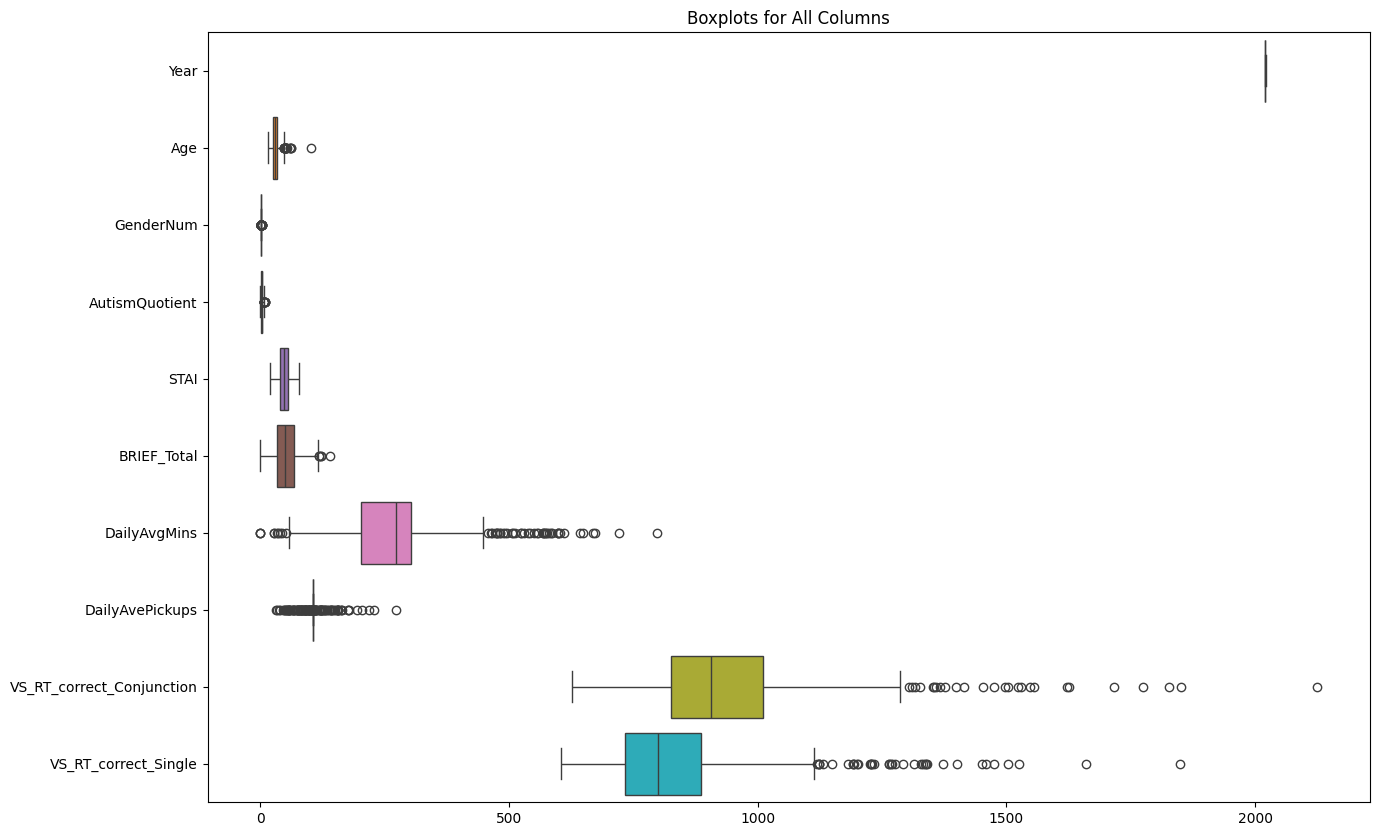

In [24]:
import matplotlib.pyplot as  plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')  # 'orient' set to 'h' for horizontal boxplots
plt.title('Boxplots for All Columns')
plt.show()

#### 1.7 The final data shape

In [25]:
df.shape

(514, 10)

## 2. Data Distribution

In [27]:
# Frequency table for Pickup counts split by gender
pickup_gender_freq = df.groupby('GenderNum')['DailyAvePickups'].count()
pickup_gender_freq

GenderNum
1    109
2    399
3      6
Name: DailyAvePickups, dtype: int64

C:\Users\Chenxi\AppData\Local\Temp\ipykernel_46928\2474762920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_gender_freq.index, y=pickup_gender_freq.values, palette='viridis')


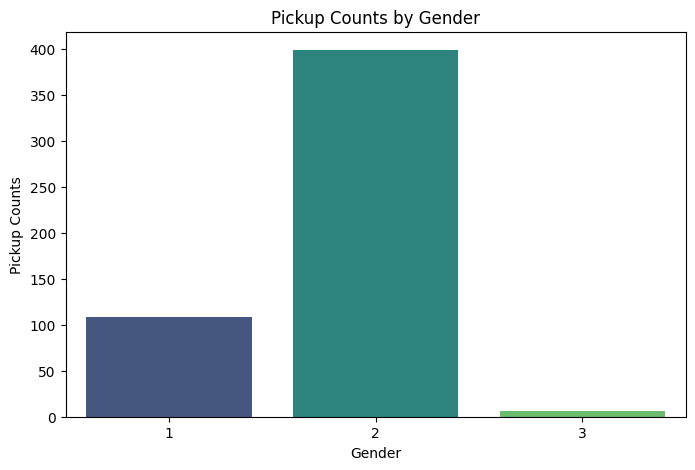

In [28]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=pickup_gender_freq.index, y=pickup_gender_freq.values, palette='viridis')
plt.title('Pickup Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Pickup Counts')
plt.show()

### 2.b. Distribution of Daily Average Minutes

#### 2.b.1 Frequency table

In [29]:
# Frequency table for Daily average minutes
daily_avg_minutes_dist = df['DailyAvgMins']
daily_avg_minutes_freq = daily_avg_minutes_dist.value_counts()
daily_avg_minutes_freq

DailyAvgMins
273    164
190      5
235      5
203      4
194      4
      ... 
412      1
580      1
373      1
378      1
88       1
Name: count, Length: 238, dtype: int64

#### 2.b.2 Histplot

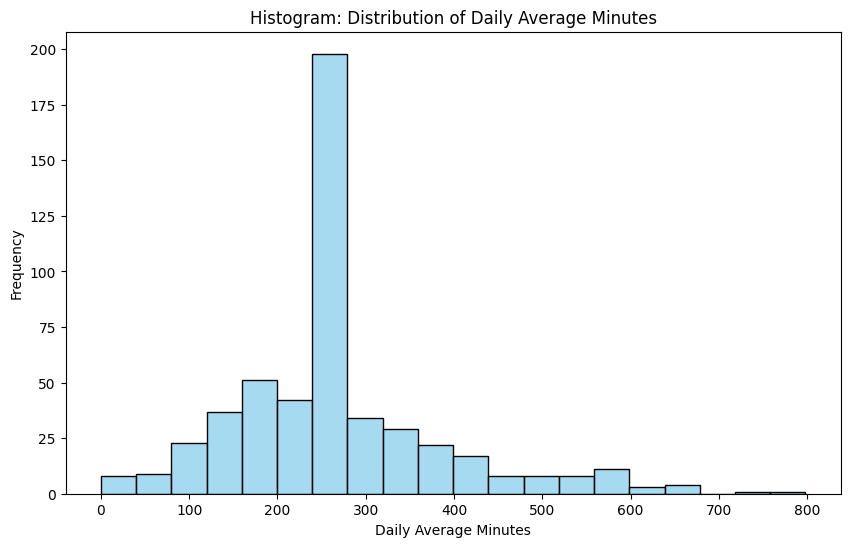

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(daily_avg_minutes_dist, bins=20, kde=False, color='skyblue')
plt.title('Histogram: Distribution of Daily Average Minutes')
plt.xlabel('Daily Average Minutes')
plt.ylabel('Frequency')
plt.show()

#### 2.b.3 KDEplot

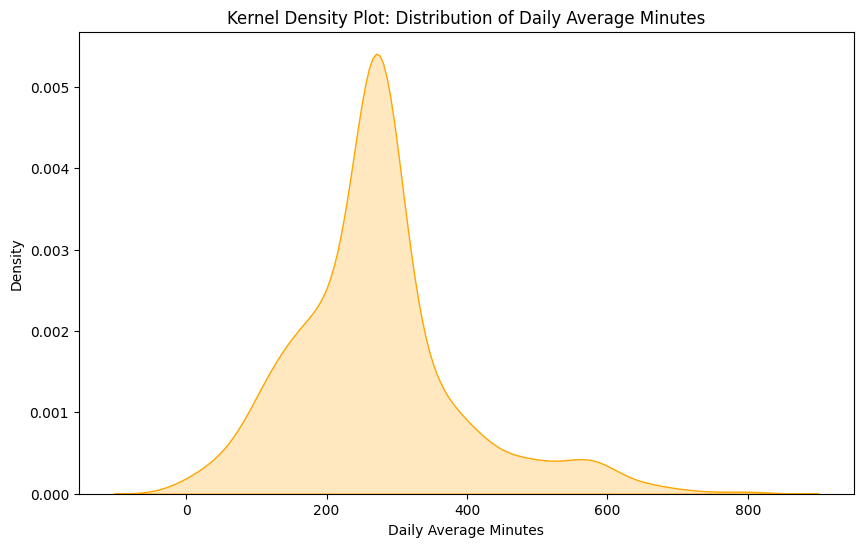

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='DailyAvgMins', color='orange', fill=True)
plt.title('Kernel Density Plot: Distribution of Daily Average Minutes')
plt.xlabel('Daily Average Minutes')
plt.ylabel('Density')
plt.show()

### 2.c.1 Relationship between Age and Response time on singleton visual search 

#### 2.c.1.1 Scatterplot

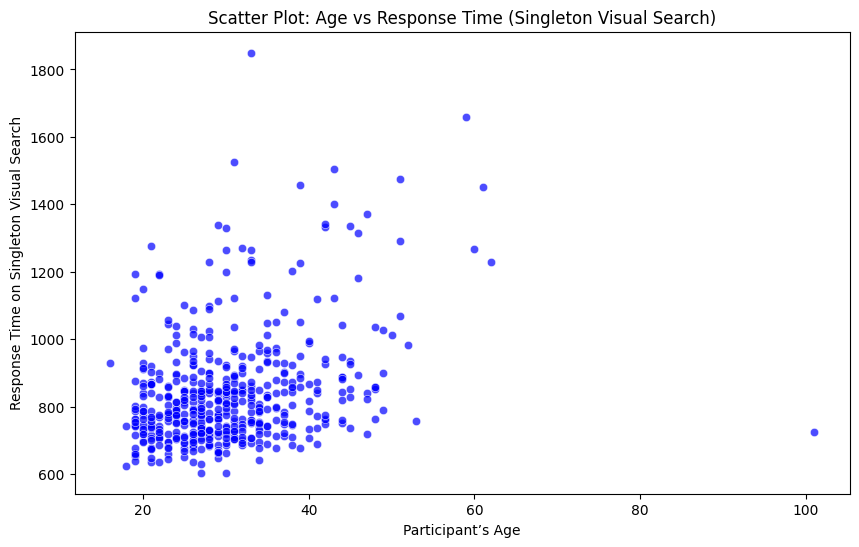

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='VS_RT_correct_Single', data=df, color='blue', alpha=0.7)
plt.title('Scatter Plot: Age vs Response Time (Singleton Visual Search)')
plt.xlabel('Participant’s Age')
plt.ylabel('Response Time on Singleton Visual Search')
plt.show()

#### 2.c.1.2 Regressionplot

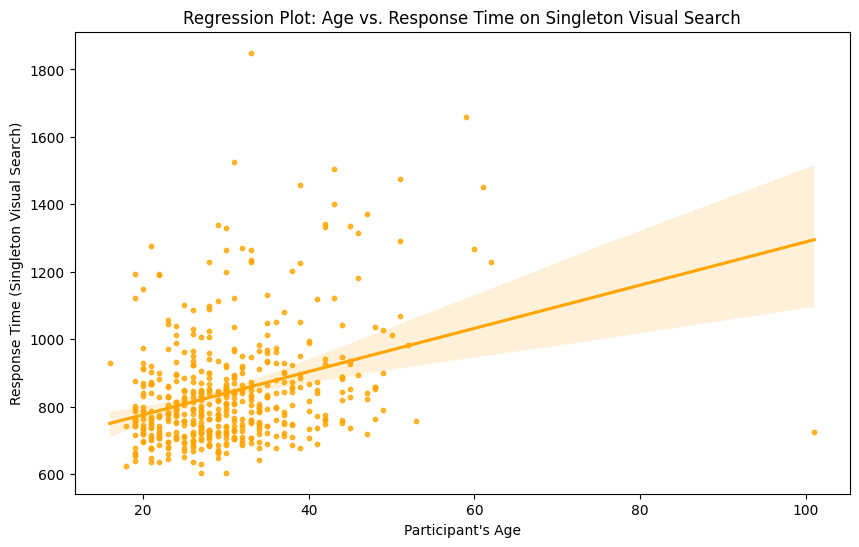

In [36]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='VS_RT_correct_Single', data=df, scatter_kws={'s': 10}, color='orange')
plt.title('Regression Plot: Age vs. Response Time on Singleton Visual Search')
plt.xlabel("Participant's Age")
plt.ylabel('Response Time (Singleton Visual Search)')
plt.show()

### 2.c.2 Relationship between gender and Response time on conjunction visual search

#### 2.c.2.1 Violinplot

C:\Users\Chenxi\AppData\Local\Temp\ipykernel_46928\2772376321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df, palette='Set2')


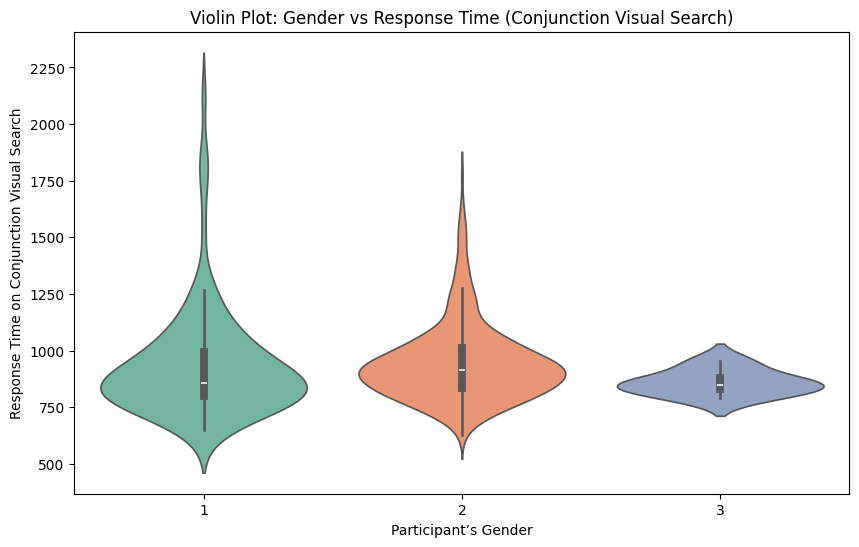

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df, palette='Set2')
plt.title('Violin Plot: Gender vs Response Time (Conjunction Visual Search)')
plt.xlabel('Participant’s Gender')
plt.ylabel('Response Time on Conjunction Visual Search')
plt.show()

#### 2.c.2.2 Boxplot

C:\Users\Chenxi\AppData\Local\Temp\ipykernel_46928\844324453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df, palette='Pastel1')


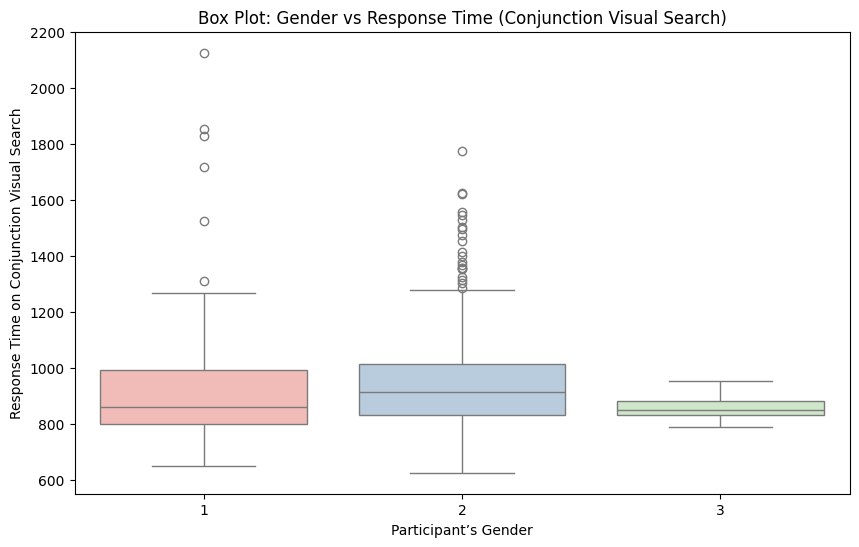

In [38]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df, palette='Pastel1')
plt.title('Box Plot: Gender vs Response Time (Conjunction Visual Search)')
plt.xlabel('Participant’s Gender')
plt.ylabel('Response Time on Conjunction Visual Search')
plt.show()

## 3. Correlation  Check
Produce  a  bivariate  correlation  table  between  Age,  STAI, BRIEF_Total, DailyAvgMins and VS_RT_correct_Single.

In [39]:
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
1,2021,37,2,8,44,33,273,105,946.470000,785.597500
5,2020,24,2,6,47,0,273,105,838.077083,988.451333
6,2022,28,2,6,49,70,273,105,845.850000,901.218750
7,2021,31,2,1,43,44,259,54,1015.666667,1524.733333
8,2021,33,2,2,51,24,475,112,1278.250000,1263.913333
...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1,3,56,39,507,105,915.785917,747.883194
544,2020,27,2,5,64,77,267,105,877.783333,720.729583
545,2020,36,2,2,46,43,610,105,1211.483333,1049.979167
546,2020,31,2,4,67,69,558,105,899.774583,845.612083


In [40]:
# Select columns for correlation
columns_for_correlation = ['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single']

In [41]:
df[columns_for_correlation].dtypes

Age                       int32
STAI                      int32
BRIEF_Total               int32
DailyAvgMins              int32
VS_RT_correct_Single    float64
dtype: object

In [42]:
# Calculate the correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

correlation_matrix

,Age,STAI,BRIEF_Total,DailyAvgMins,VS_RT_correct_Single
Age,1.000000,-0.119538,-0.080787,-0.125009,0.327068
STAI,-0.119538,1.000000,0.647655,0.007630,-0.073065
BRIEF_Total,-0.080787,0.647655,1.000000,0.067071,0.018389
DailyAvgMins,-0.125009,0.007630,0.067071,1.000000,-0.032853
VS_RT_correct_Single,0.327068,-0.073065,0.018389,-0.032853,1.000000


## 4. Linear  Regression
Perform  a  linear  regression  to  see  if  DailyAvgMins  predicts VS_RT_correct_Single

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
# Selecting relevant columns
X = df[['DailyAvgMins']]
y = df['VS_RT_correct_Single']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [45]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([850.00848218, 841.32383705, 855.30705628, 851.19987754,
       847.87651153, 850.00848218, 849.63225206, 842.70334747,
       849.7576621 , 850.25930225, 854.68000609, 848.19003663,
       855.18164624, 850.00848218, 845.68183587, 851.51340263,
       850.35335978, 850.00848218, 850.00848218, 850.00848218,
       850.00848218, 850.00848218, 850.00848218, 850.00848218,
       850.00848218, 856.49845164, 847.97056906, 850.00848218,
       850.00848218, 850.79229491, 853.48861073, 848.03327408,
       850.00848218, 848.53491423, 851.67016518, 845.80724591,
       853.30049567, 855.62058137, 850.00848218, 850.00848218,
       850.00848218, 850.03983468, 848.7543818 , 853.7394308 ,
       853.70807829, 852.32856788, 850.00848218, 846.96728876,
       848.97384936, 852.67344548, 850.00848218, 850.00848218,
       856.40439411, 848.00192157, 850.00848218, 845.30560575,
       850.00848218, 854.64865358, 850.00848218, 854.58594856,
       849.53819453, 850.00848218, 845.61913085, 850.00

In [46]:
y_fit = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_fit)
mse_train

30998.359276883875

In [47]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 14892.182935520883


In [48]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mae}")

Mean Squared Error: 99.88692321871022


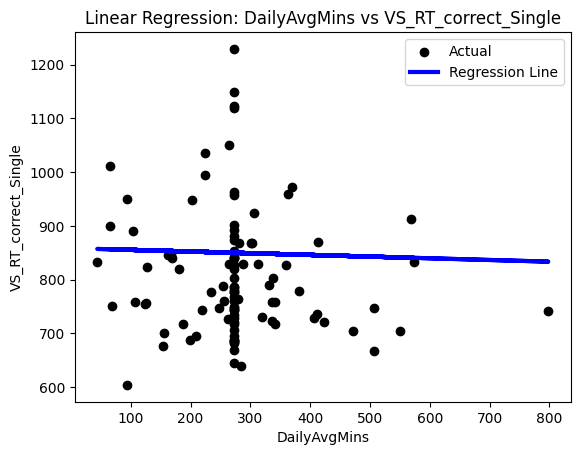

In [49]:
# Plotting the regression line
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('DailyAvgMins')
plt.ylabel('VS_RT_correct_Single')
plt.title('Linear Regression: DailyAvgMins vs VS_RT_correct_Single')
plt.legend()
plt.show()

In [50]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.1892
Date:                  Sun, 03 Dec 2023   Prob (F-statistic):              0.664
Time:                          19:10:40   Log-Likelihood:                -2708.4
No. Observations:                   411   AIC:                             5421.
Df Residuals:                       409   BIC:                             5429.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          858.5677     21.383     40.152      0.000     816.533     900.602
DailyAvgMins    -0.0314      0.072     -0.435      0.664      -0.173       0.110
==============================================================================
Omnibus:                      183.474   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.259
Skew:                           2.013   Prob(JB):                    5.95e-160
Kurtosis:                       8.158   Cond. No.                         729.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **if DailyAvgMins predicts VS_RT_correct_Single?**
- The low R-squared and Adjusted R-squared values suggest that the model does not explain much of the variance in VS_RT_correct_Single. The p-value for DailyAvgMins is 0.298, indicating that it may not be a significant predictor in this model.

## 5. Multiple  Regression

In [51]:
X_multi = df[['DailyAvgMins', 'Age', 'GenderNum', 'STAI', 'BRIEF_Total', 'DailyAvePickups']]
y_multi = df['VS_RT_correct_Single']

# Splitting the data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [52]:
# Creating a multiple regression model
model_multi = LinearRegression()

# Fitting the model to the training data
model_multi.fit(X_train_multi, y_train_multi)

LinearRegression()

In [53]:
# Making predictions on the test set
y_pred_multi = model_multi.predict(X_test_multi)
y_pred_multi

array([ 850.90748151,  865.0273029 ,  873.22610601,  797.58129629,
        833.38225205,  805.57985363,  790.29130607,  838.12716603,
        754.0476773 ,  838.48641957,  782.72840156,  823.86826815,
       1003.26026251,  887.52596995,  773.73701564,  851.42858855,
        835.02148061,  853.87855053,  793.36156486,  902.41041868,
        814.32108183,  815.96105826,  790.28267476,  799.40368714,
        781.53488448,  938.64832737,  850.07744176,  839.53414075,
        885.27418444,  795.48630348,  790.21300207,  781.58280342,
        825.80337028,  835.02474695,  786.1822786 ,  868.54177468,
        865.78873933,  810.38174127,  748.24728644,  930.77450738,
        810.18420858,  833.49835934,  914.21146812,  761.22471603,
        788.18939133,  796.80646694,  902.12634221,  784.4946116 ,
        870.19174858,  853.94102095,  861.54183278,  893.20911546,
        811.59847839,  850.39034358,  768.35629151,  773.72923447,
        842.93617262,  813.70287037,  828.31026108,  747.14803

In [54]:
# Evaluating the model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
print(f"Mean Squared Error (Multiple Regression): {mse_multi}")

# Compare the performance of the multiple regression model to the previous model
print(f"Mean Squared Error (Single Regression): {mse}")

Mean Squared Error (Multiple Regression): 13897.456631536203
Mean Squared Error (Single Regression): 14892.182935520883


In [55]:
# Check the coefficients and intercept of the model
coefficients = model_multi.coef_
intercept = model_multi.intercept_
coefficients

array([ 0.04019673,  6.28069667,  0.0914186 , -1.81381785,  0.6709656 ,
       -0.88138095])

In [56]:
#For comparsion use
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.1892
Date:                  Sun, 03 Dec 2023   Prob (F-statistic):              0.664
Time:                          19:11:29   Log-Likelihood:                -2708.4
No. Observations:                   411   AIC:                             5421.
Df Residuals:                       409   BIC:                             5429.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          858.5677     21.383     40.152      0.000     816.533     900.602
DailyAvgMins    -0.0314      0.072     -0.435      0.664      -0.173       0.110
==============================================================================
Omnibus:                      183.474   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.259
Skew:                           2.013   Prob(JB):                    5.95e-160
Kurtosis:                       8.158   Cond. No.                         729.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Assuming X_train_multi and y_train_multi are your training data
# Add a constant to the predictor matrix (required for statsmodels)
X_train_multi = sm.add_constant(X_train_multi)

# Fit the multiple regression model using statsmodels
model_multi_sm = sm.OLS(y_train_multi, X_train_multi).fit()

# Display the summary of the model
model_multi_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     VS_RT_correct_Single   R-squared:                       0.131
Model:                              OLS   Adj. R-squared:                  0.119
Method:                   Least Squares   F-statistic:                     10.19
Date:                  Sun, 03 Dec 2023   Prob (F-statistic):           1.64e-10
Time:                          19:11:36   Log-Likelihood:                -2679.5
No. Observations:                   411   AIC:                             5373.
Df Residuals:                       404   BIC:                             5401.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             790.3746     72.899     10.842      0.000     647.065     933.684
DailyAvgMins        0.0402      0.069      0.584      0.560      -0.095       0.176
Age                 6.2807      0.964      6.515      0.000       4.385       8.176
GenderNum           0.0914     19.323      0.005      0.996     -37.894      38.077
STAI               -1.8138      0.934     -1.942      0.053      -3.650       0.022
BRIEF_Total         0.6710      0.448      1.498      0.135      -0.209       1.551
DailyAvePickups    -0.8814      0.377     -2.338      0.020      -1.622      -0.140
==============================================================================
Omnibus:                      148.822   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.380
Skew:                           1.616   Prob(JB):                    2.76e-118
Kurtosis:                       7.601   Cond. No.                     2.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Compare the two sheet,we can find that:**
- R-squared increases from 0.011 to 0.247, indicating a better fit and further validating that the amount of variance accounted for in the outcome increase.
- The estimated coefficient for DailyAvgMins is 0.0054,which is very close to zero (0.0054), suggesting a very small impact.
- The p-value associated for DailyAvgMins is 0.965. And a high p-value suggests that DailyAvgMins is not statistically significant. 